# Initialization

## Import

### Library

In [6]:
from statsmodels.tools.sm_exceptions import InterpolationWarning, ValueWarning
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

### Data

In [7]:
datasets = ['Activation Oktober', 'Activation November']
path = 'Dataset/'
raw_data = pd.concat(
    [pd.read_excel(path + dataset + '.xlsx') for dataset in datasets]
)

print(f'Columns: {raw_data.columns}')
raw_data.head()

Columns: Index(['activation_date', 'account_num', 'msisdn', 'cust_name', 'package_name',
       'order_type', 'package_type', 'tenure', 'dealer_id', 'store', 'channel',
       'region', 'area', 'id_number', 'salesperson_nm', 'comment_text',
       'created', 'outlet_code', 'outlet_name', 'galeri_name', 'branch_name',
       'region_name', 'store_code_rev', 'Region_Rev', 'Area_Rev', 'SALES AREA',
       'Channel_Rev', 'Store Name_Rev', 'Channel_Partner Store_Group',
       'Channel_Partner_Store_Detail', 'Circle', 'Region New 2024', 'RCM',
       'sales_name', 'nik_sales', 'Check Duplicate', 'Check Query', 'Days',
       'Invoice No. Ipos', 'Tactical/Regular', 'Package_Rev',
       'Acq Revenue (mio)', 'Guaranteed Ravenue excl VAT (mio)',
       'Guaranteed Revenue (Mio)', 'Promotor', 'Point', 'Agent Type',
       'invoice_amount', 'SRP', 'MS', 'Unnamed: 50', 'Indomaret',
       'no_imkas_sales', 'npwp_sales', 'alamat_sales', 'nik_pelanggan',
       'SPV_Name', 'NIK_SPV', 'no imkas_SPV'

,activation_date,account_num,msisdn,cust_name,package_name,order_type,package_type,tenure,dealer_id,store,...,no imkas_Team Leader,no NPWP Team Leader,Alamat Team Leader,Remarks,package_group,Verification Status,Invoice No. Myretail,BSM,Detail reason Category,Status SR
0,20241001,11148328,6285746007778,SUPRIYONO,Prime New 100 - Contract 12,Change Postpaid Plan,Contract,12,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20241001,11148378,6281547117017,I KOMANG DODI SUSILA,Prime New 100 - Contract 12,Change Postpaid Plan,Contract,12,DS05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20241002,80597584,6285812122024,ABDURRAHIM KADIRABDURRAHIM KADIR,Prime-100 - Contract - 3,New Registration,Contract,3,DS04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20241001,80596352,6285776387559,INTAN PERMATA SARIINTAN PERMATA SARI,Prime 70GB - Contract 3,New Registration,Contract,3,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20241002,80597751,6285668838888,EKO PUDJI KRISTIARSOEKO PUDJI KRISTIARSO,Prime-70 - Contract - 12,New Registration,Contract,12,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data

,activation_date,account_num,msisdn,cust_name,package_name,order_type,package_type,tenure,dealer_id,store,...,no imkas_Team Leader,no NPWP Team Leader,Alamat Team Leader,Remarks,package_group,Verification Status,Invoice No. Myretail,BSM,Detail reason Category,Status SR
0,20241001,11148328,6285746007778,SUPRIYONO,Prime New 100 - Contract 12,Change Postpaid Plan,Contract,12,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20241001,11148378,6281547117017,I KOMANG DODI SUSILA,Prime New 100 - Contract 12,Change Postpaid Plan,Contract,12,DS05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20241002,80597584,6285812122024,ABDURRAHIM KADIRABDURRAHIM KADIR,Prime-100 - Contract - 3,New Registration,Contract,3,DS04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20241001,80596352,6285776387559,INTAN PERMATA SARIINTAN PERMATA SARI,Prime 70GB - Contract 3,New Registration,Contract,3,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20241002,80597751,6285668838888,EKO PUDJI KRISTIARSOEKO PUDJI KRISTIARSO,Prime-70 - Contract - 12,New Registration,Contract,12,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,20241129,80198775,6285858354354,BAMBANG WAHYU WIJONARKO,Platinum 50 Bundling 12 Bulan,Change Postpaid Plan,Contract,12,DS05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,NaN
1344,20241130,80662626,6285877077302,GANGGA BAYU PAMUNGKASGANGGA BAYU PAMUNGKAS,Platinum 100GB - 2 Lines P,New Registration,Non Contract,1,DS04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,NaN
1345,20241130,80662087,6285819981018,NYOMAN MEGAYANTINYOMAN MEGAYANTI,Platinum 100 Bundling 12 Bulan,New Registration,Contract,12,DS05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,NaN
1346,20241129,80553908,6285720002107,ALFIAN ARIF RAHMAN,Platinum 50 Bundling 3 Bulan,Change Postpaid Plan,Contract,3,DS03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NaN,NaN


## Suppress Warning

In [8]:
warnings.simplefilter('ignore', InterpolationWarning)
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', UserWarning)

## Styling

In [9]:
# Matplotlib plot style
plt.style.use("fivethirtyeight")
rcParams['figure.figsize'] = 18, 8

# Preparation

## Data Preprocessing

### Variable Selection

In [10]:
columns = ['activation_date', 'dealer_id', 'Guaranteed Revenue (Mio)']

df_raw = raw_data[columns].copy()
df_raw.reset_index(drop=True, inplace=True)
df_raw.tail()

,activation_date,dealer_id,Guaranteed Revenue (Mio)
2443,20241129,DS05,0.9500
2444,20241130,DS04,0.0800
2445,20241130,DS05,1.3500
2446,20241129,DS03,0.3150
2447,20241130,DS03,0.0777


In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activation_date           2448 non-null   int64  
 1   dealer_id                 2448 non-null   object 
 2   Guaranteed Revenue (Mio)  2448 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 57.5+ KB


📝**Note:**  
- The activation_date column type is not a datetime type.
Therefore, it is necessary to match the data type again on the dataset.
- The Guaranteed Value (Mio) represents the company's revenue in millions rupiah.
Therefore, it is necessary to multiply by one million to convert the unit into one rupiah.

### Data Transformation

1. Rename the columns
2. Convert the date values to datetime
3. Multiply the revenue values by 1.000.000

In [12]:
columns_rename = {
    'activation_date': 'date',
    'Guaranteed Revenue (Mio)': 'revenue',
    'dealer_id': 'channel'
}

df = df_raw.copy()
df.rename(columns=columns_rename, inplace=True)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
df['revenue'] = (df.revenue * 1000000).astype(int)
df.tail()

,date,channel,revenue
2443,2024-11-29,DS05,950000
2444,2024-11-30,DS04,80000
2445,2024-11-30,DS05,1350000
2446,2024-11-29,DS03,315000
2447,2024-11-30,DS03,77700


In [13]:
df['channel'].unique()

array(['DS03', 'DS05', 'DS04'], dtype=object)

📝**Note:**  Analysis is only required on channels DS03, DS04, and DS05.
Therefore, it was necessary to filter the data by channel. 

### Data Cleaning

#### Filter and Missing Values Handling

In [14]:
# A selection of channels taken from the data
channel_filter = ['DS03', 'DS04', 'DS05']

s_rev = df.copy()
s_rev = s_rev[s_rev['channel'].isin(channel_filter)]

# Resample data with daily frequency
s_rev = s_rev.resample('D', on='date')
s_rev = s_rev['revenue'].sum()
s_rev.interpolate('linear', inplace=True)  # Missing value handling

#### Outlier Check

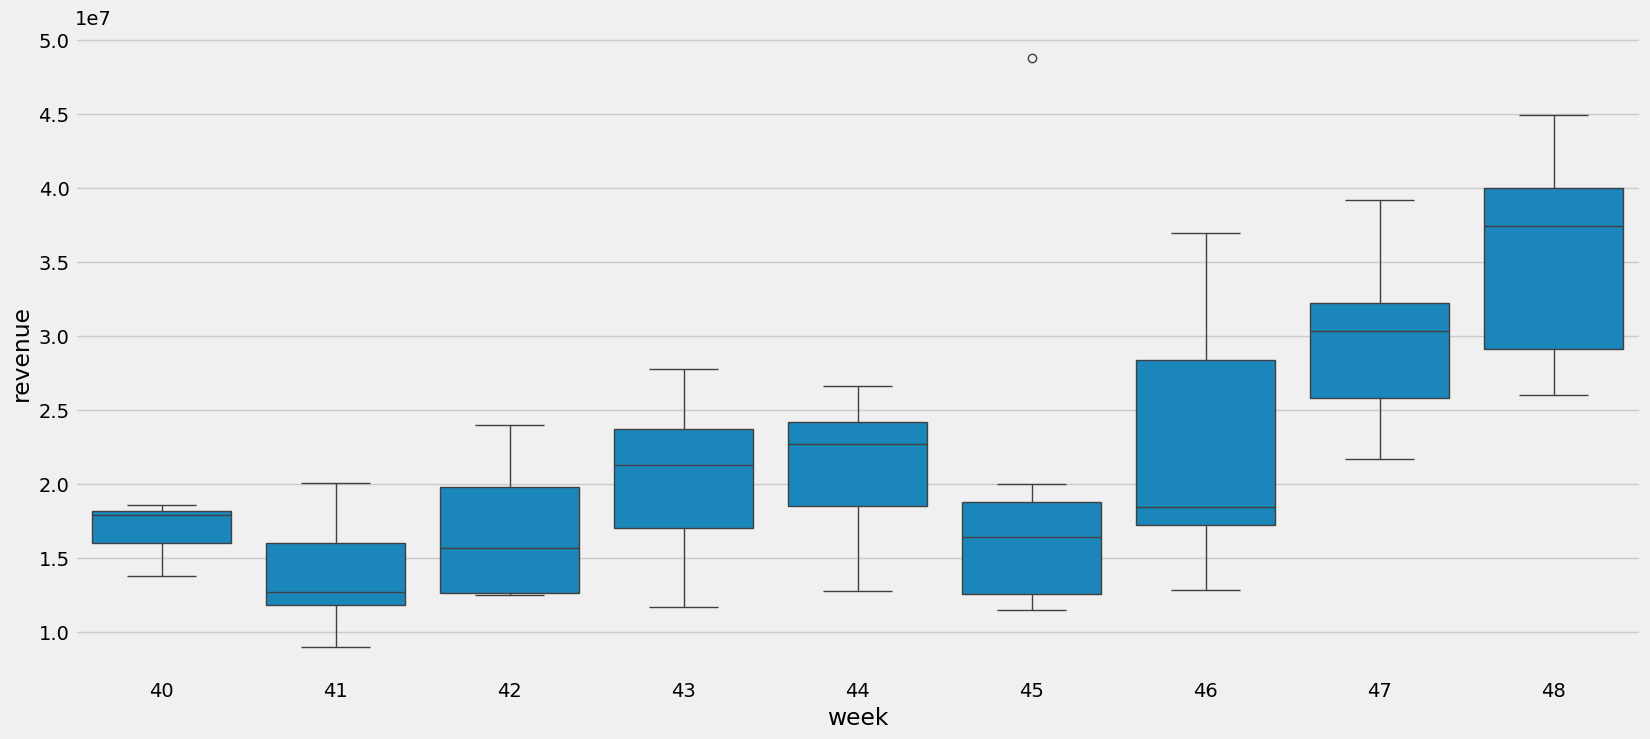

In [15]:
sns.boxplot(x=s_rev.index.isocalendar()['week'], y=s_rev)
plt.show()

📝**Note:** An outlier was detected at week 45.

#### Dataset scaling

In [16]:
# Displays the parameters that will be used to scale the data with the zscore method
s_rev.describe()[['count', 'mean', 'std']]

count    6.100000e+01
mean     2.173072e+07
std      9.068809e+06
Name: revenue, dtype: float64

In [17]:
# Scale the data using the StandardScaler function from scikit-learn
scaler = StandardScaler()

shape = s_rev.shape
index = s_rev.index
array_rev = scaler.fit_transform(s_rev.values.reshape(-1, 1))
s_rev = pd.Series(array_rev.reshape(shape), index=index)

#### Outlier Handling

In [18]:
def zscore(s: pd.Series, window: int, thresh=3):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)
    m = z.between(-thresh, thresh)
    
    return s.astype(float).where(m, avg)


s_rev = zscore(s_rev, window=7, thresh=2)

### Output

In [19]:
s_rev

date
2024-10-01   -0.447537
2024-10-02   -0.700512
2024-10-03   -0.351608
2024-10-04   -0.391823
2024-10-05   -0.886566
                ...   
2024-11-26    0.537857
2024-11-27    1.692906
2024-11-28    2.111010
2024-11-29    2.582016
2024-11-30    0.474127
Freq: D, Length: 61, dtype: float64

## Data Exploration

### Time Series Plot

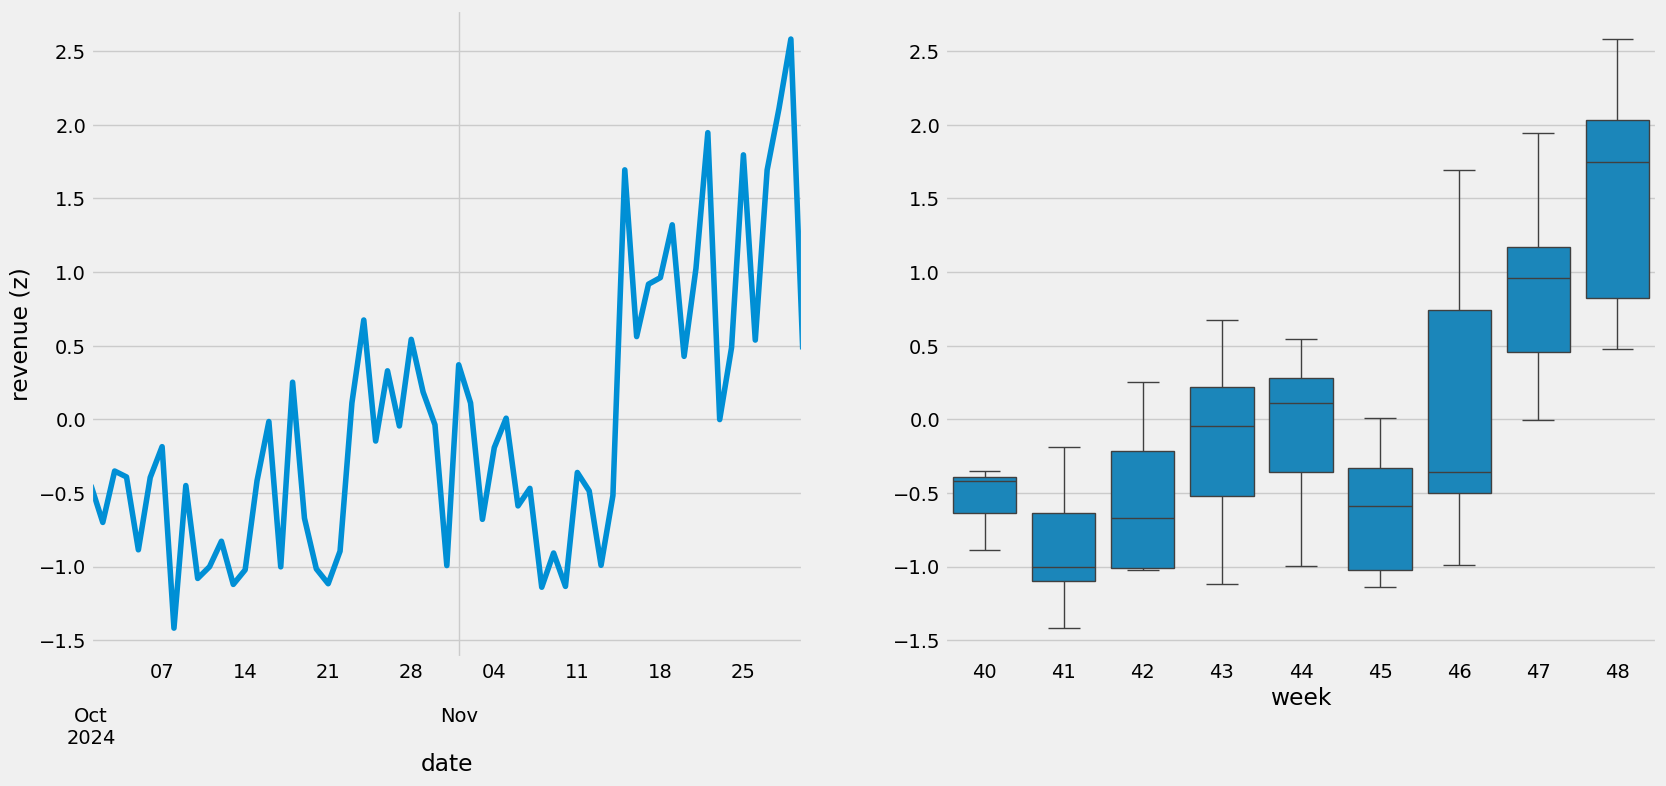

In [20]:
y = s_rev.copy()

fig, ax = plt.subplots(1, 2)
y.plot(ax=ax[0], ylabel='revenue (z)')
sns.boxplot(x=y.index.isocalendar()['week'], y=y, ax=ax[1])

plt.ylabel(None)
plt.show()

### Time Series Seoasonal Decompose

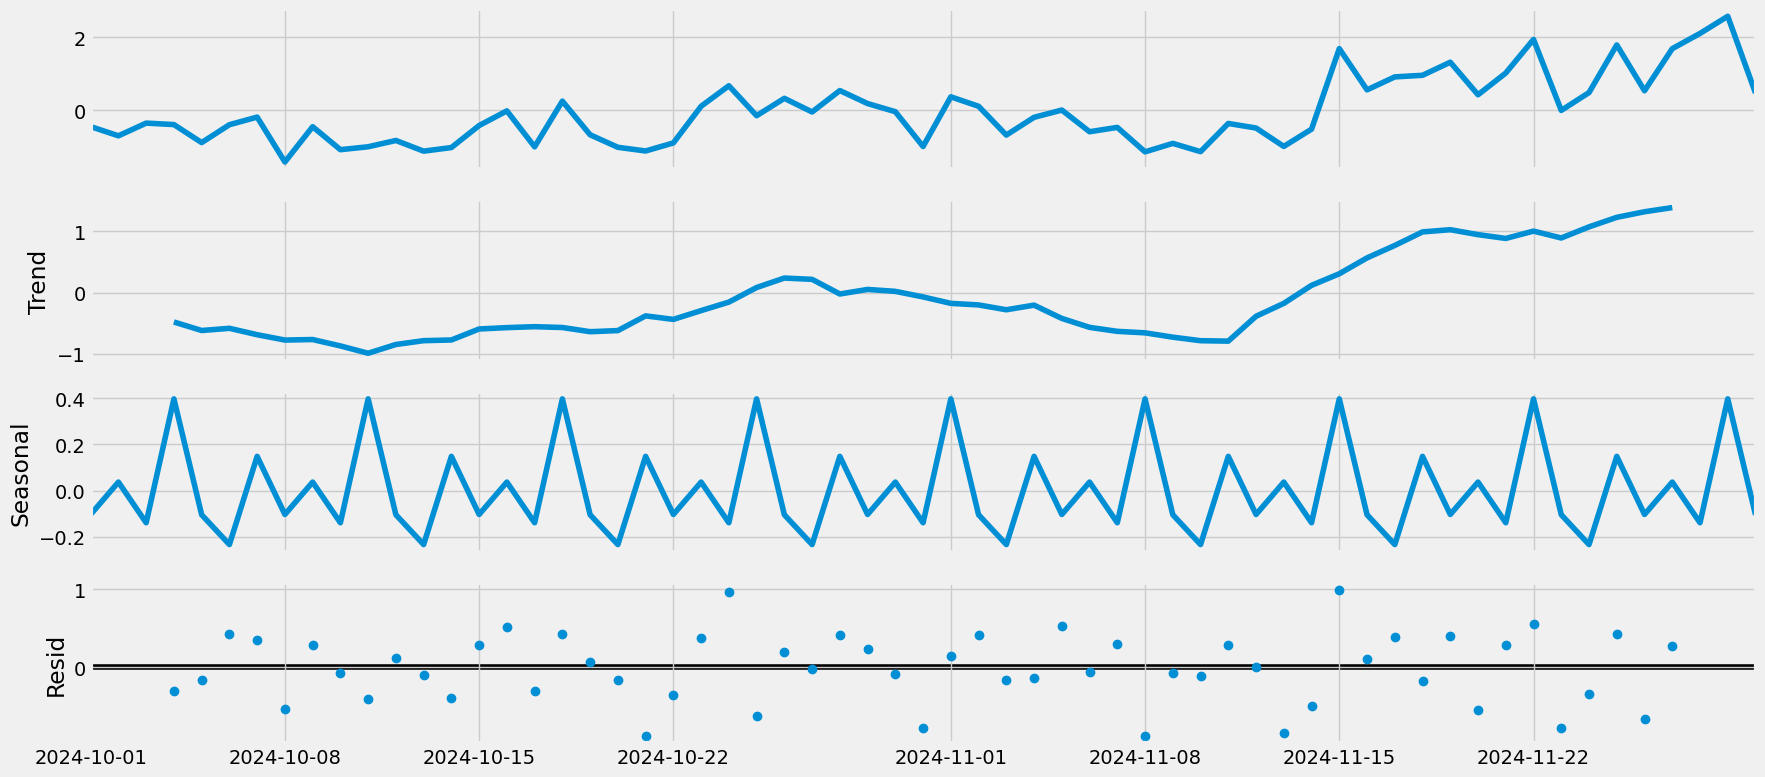

In [21]:
decomposition = seasonal_decompose(y)
decomposition.plot()
plt.show()

### Auto Correlation and Partial Auto Correlation

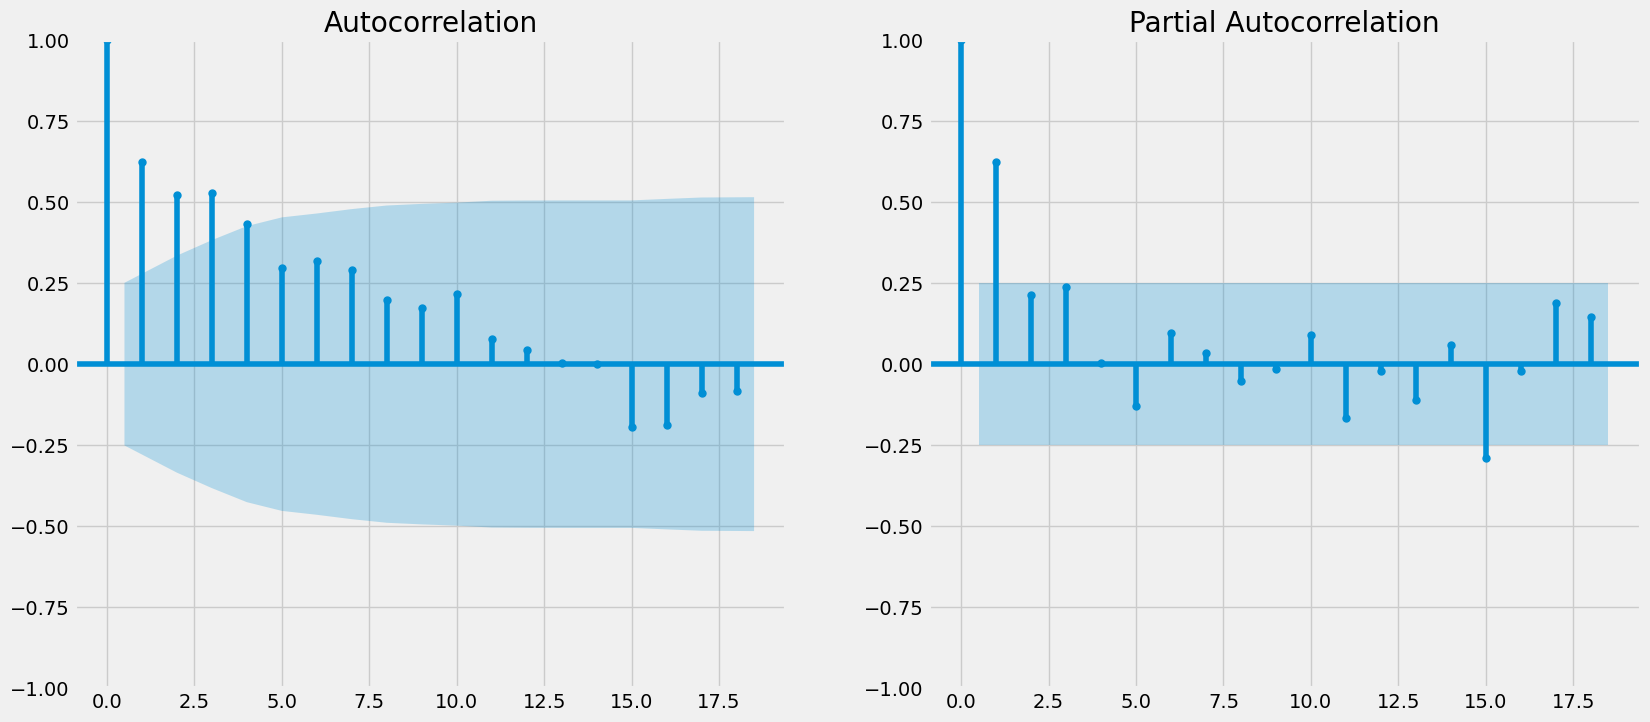

In [22]:
fig, ax = plt.subplots(1, 2)

plot_acf(y, ax=ax[0])
plot_pacf(y, ax[1])

plt.show()

# Modelling

## Data Stationary Test

In [25]:
def test_adfuller(data, alpha=0.05):
    result = adfuller(data)
    labels=['ADF Test Statistic', 'p-value', '#Lags Used']

    for label, value in zip(labels, result):
        print(f'{label}: {value}')

    if result[1] < alpha:
        print('H0 is rejected, series is stationary')
        
    else:
        print('Failed to reject H0, series is not stationary')

In [26]:
test_adfuller(y)

ADF Test Statistic: -1.0512151324787553
p-value: 0.7341297768948964
#Lags Used: 2
Failed to reject H0, series is not stationary


## Seasonal Differencing Method

In [27]:
print('4 Lag Seasonal Difference')
ydf4 = y.diff(4).dropna()
test_adfuller(ydf4)

print('\n6 Lag Seasonal Difference')
ydf6 = y.diff(6).dropna()
test_adfuller(ydf6)

4 Lag Seasonal Difference
ADF Test Statistic: -3.9835003573941545
p-value: 0.0014994156627212347
#Lags Used: 3
H0 is rejected, series is stationary

6 Lag Seasonal Difference
ADF Test Statistic: -2.894185586256346
p-value: 0.046028324558268
#Lags Used: 11
H0 is rejected, series is stationary


<Axes: xlabel='date', ylabel='None'>

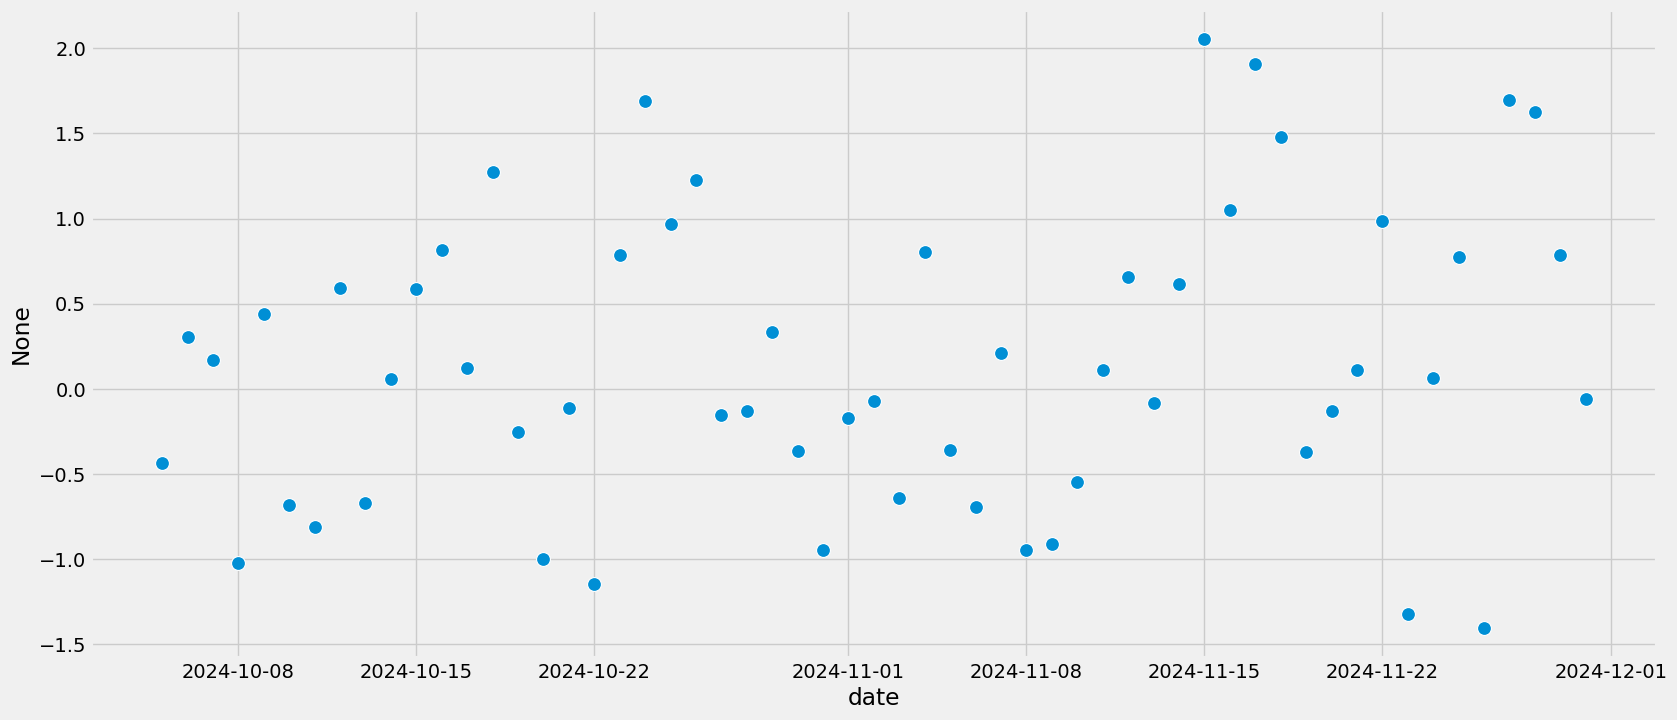

In [31]:
sns.scatterplot(x=ydf4.index, y=ydf4, s=100)

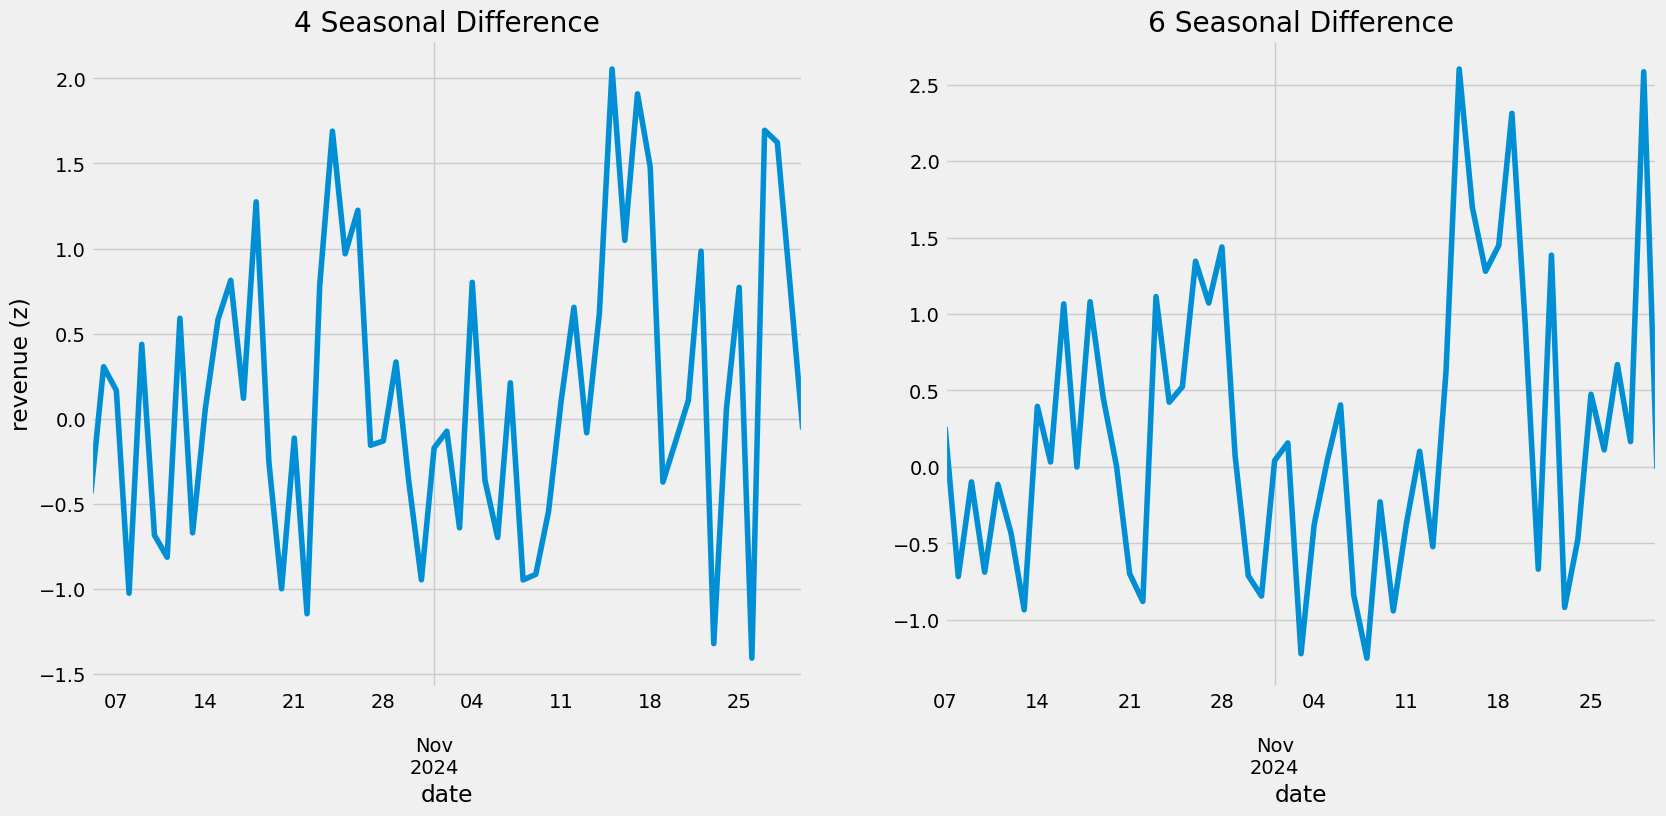

In [21]:
fig, ax = plt.subplots(1, 2)

ydf4.plot(title='4 Seasonal Difference', ax=ax[0], ylabel='revenue (z)')
ydf6.plot(title='6 Seasonal Difference', ax=ax[1])

plt.ylabel(None)
plt.show()

## Train Test Split Validation

In [22]:
# Split 90% of the data as train set
test_ratio = 0.1
test_index = int(len(y) * test_ratio)

train = y[:-test_index]
test = y[-test_index:]

## Determining the Best Parameter using Grid Search

In [23]:
# 
n = 3
s = (4, 6)

PDQ_params = [(i, 1, j, k) for i in range(n) for j in range(n) for k in s]
pdq_params = [(i, 1, j) for i in range(n) for j in range(n)]

aic_results = []

for pdq_param in pdq_params:
    for PDQ_param in PDQ_params:
        model = ARIMA(
            train, order=pdq_param, seasonal_order=PDQ_param
        )
        result = model.fit()
        aic_results.append((result.aic, pdq_param, PDQ_param))

        print(f'ARIMA({pdq_param})({PDQ_param}) - AIC: {result.aic:.2f}')

best_p = min(aic_results)
print(f'\nLowest AIC value: {best_p[0]:.2f} - ARIMA({best_p[1]})({best_p[2]})')

ARIMA((0, 1, 0))((0, 1, 0, 4)) - AIC: 142.47
ARIMA((0, 1, 0))((0, 1, 0, 6)) - AIC: 135.92
ARIMA((0, 1, 0))((0, 1, 1, 4)) - AIC: 126.77
ARIMA((0, 1, 0))((0, 1, 1, 6)) - AIC: 123.92
ARIMA((0, 1, 0))((0, 1, 2, 4)) - AIC: 128.24
ARIMA((0, 1, 0))((0, 1, 2, 6)) - AIC: 125.92
ARIMA((0, 1, 0))((1, 1, 0, 4)) - AIC: 138.03
ARIMA((0, 1, 0))((1, 1, 0, 6)) - AIC: 129.14
ARIMA((0, 1, 0))((1, 1, 1, 4)) - AIC: 128.38
ARIMA((0, 1, 0))((1, 1, 1, 6)) - AIC: 125.92
ARIMA((0, 1, 0))((1, 1, 2, 4)) - AIC: 126.46
ARIMA((0, 1, 0))((1, 1, 2, 6)) - AIC: 126.71
ARIMA((0, 1, 0))((2, 1, 0, 4)) - AIC: 134.71
ARIMA((0, 1, 0))((2, 1, 0, 6)) - AIC: 126.98
ARIMA((0, 1, 0))((2, 1, 1, 4)) - AIC: 129.59
ARIMA((0, 1, 0))((2, 1, 1, 6)) - AIC: 127.54
ARIMA((0, 1, 0))((2, 1, 2, 4)) - AIC: 128.23
ARIMA((0, 1, 0))((2, 1, 2, 6)) - AIC: 128.39
ARIMA((0, 1, 1))((0, 1, 0, 4)) - AIC: 129.45
ARIMA((0, 1, 1))((0, 1, 0, 6)) - AIC: 128.37
ARIMA((0, 1, 1))((0, 1, 1, 4)) - AIC: 113.91
ARIMA((0, 1, 1))((0, 1, 1, 6)) - AIC: 111.90
ARIMA((0, 

## SARIMA Implementation

In [24]:
model = ARIMA(train, order=best_p[1], seasonal_order=best_p[2])
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   55
Model:             ARIMA(2, 1, 0)x(0, 1, [1], 6)   Log Likelihood                 -51.316
Date:                           Thu, 05 Dec 2024   AIC                            110.632
Time:                                   20:36:13   BIC                            118.117
Sample:                               10-01-2024   HQIC                           113.461
                                    - 11-24-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6094      0.140     -4.354      0.000      -0.884      -0.335
ar.L2         -0.4549      0.191     -2.382

# Evaluation 

## Model Diagnostics

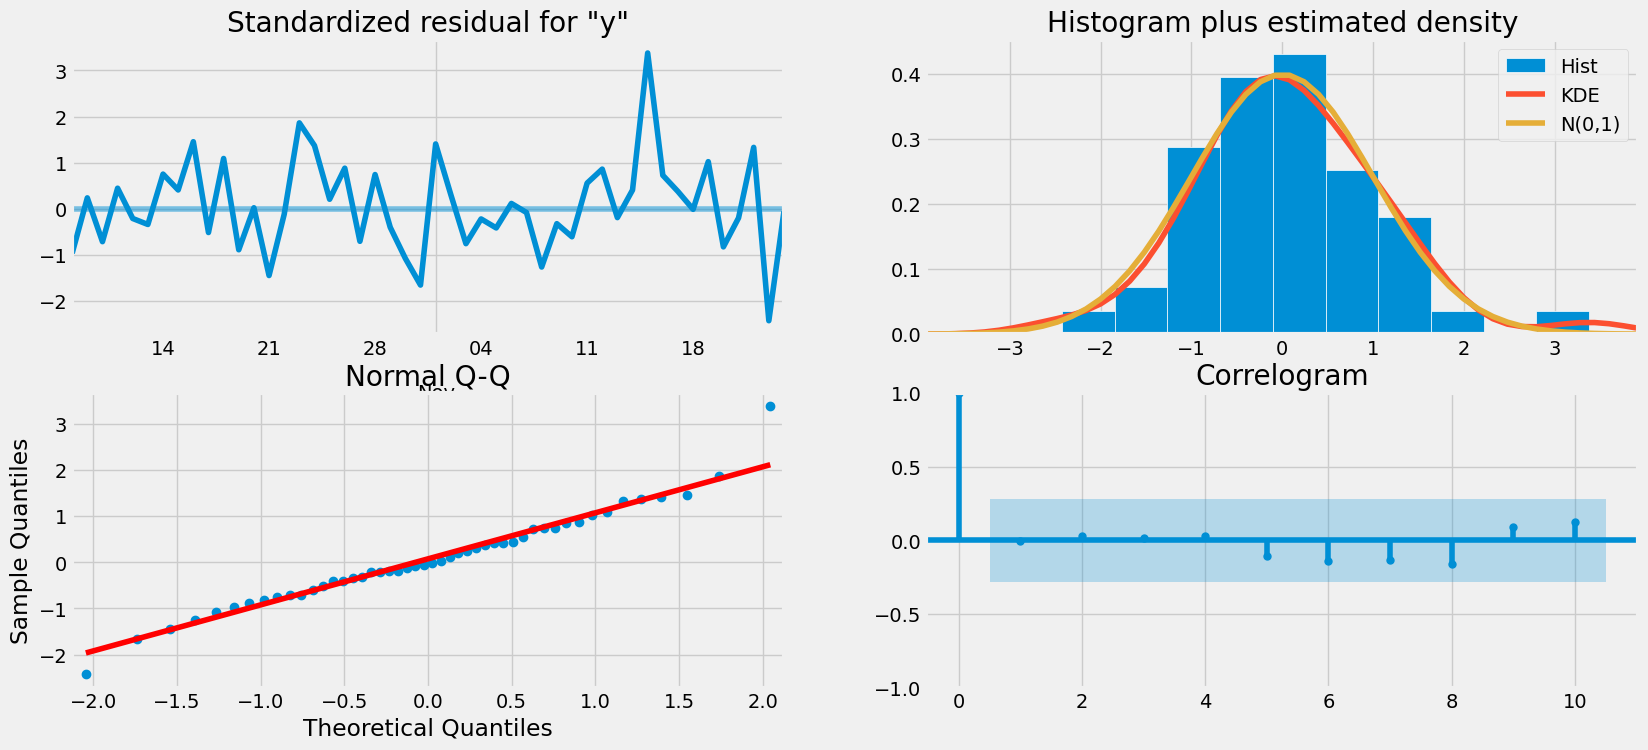

In [25]:
result.plot_diagnostics();

## Prediction VS Observed Values

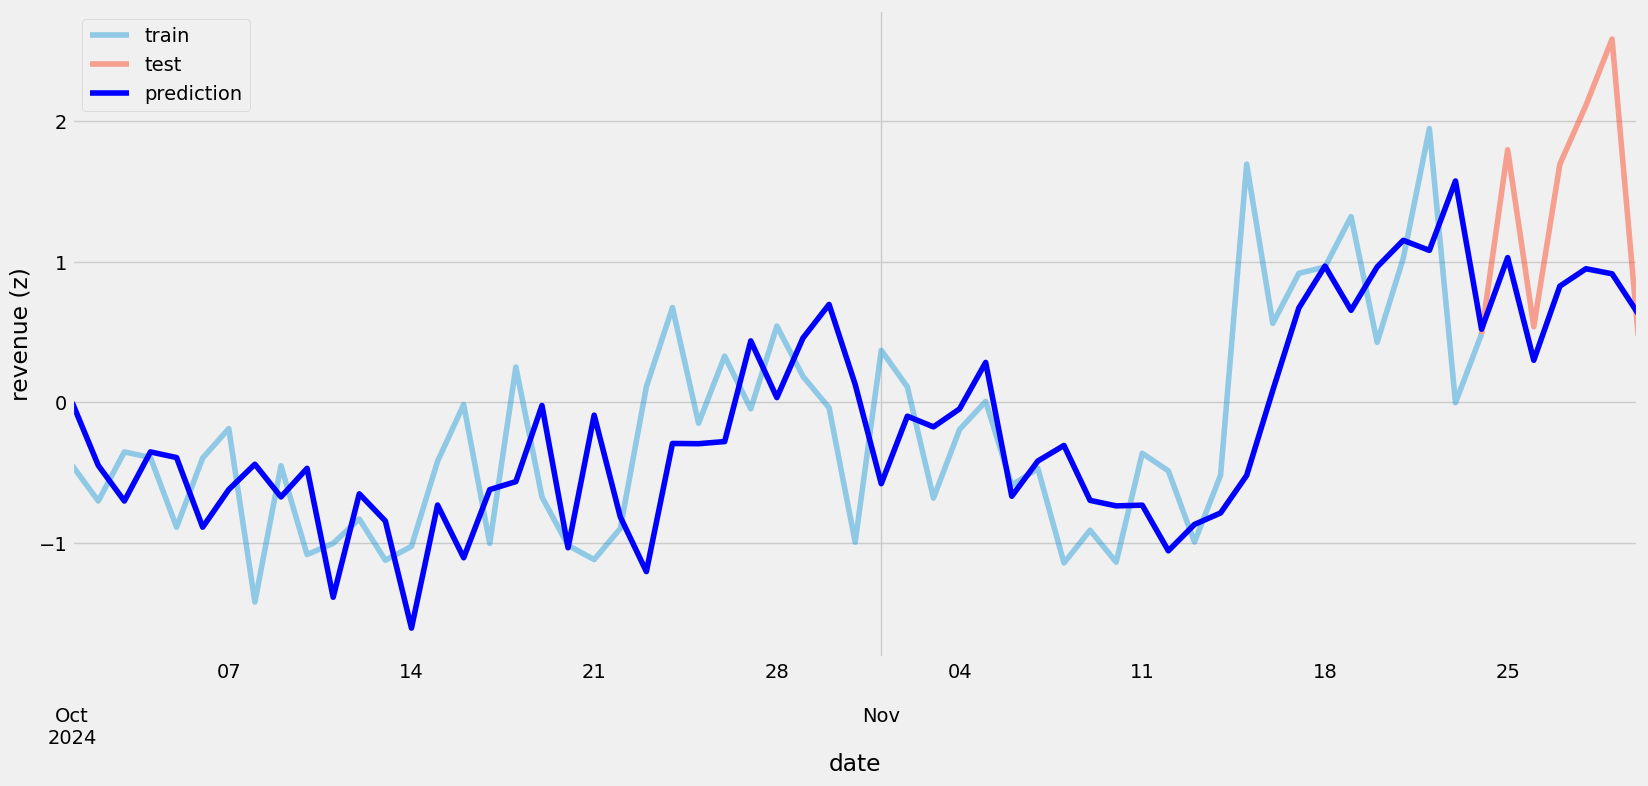

In [26]:
minmax = y.index.min(), y.index.max()
pred = result.get_prediction(minmax[0], minmax[1])
test_ = y[-(test_index + 1):]

train.plot(label='train', alpha=.4)
test_.plot(label='test', alpha=.5)
pred.predicted_mean.plot(label='prediction', color='blue')

plt.ylabel('revenue (z)')
plt.legend()
plt.show()

## Prediction VS Test Set

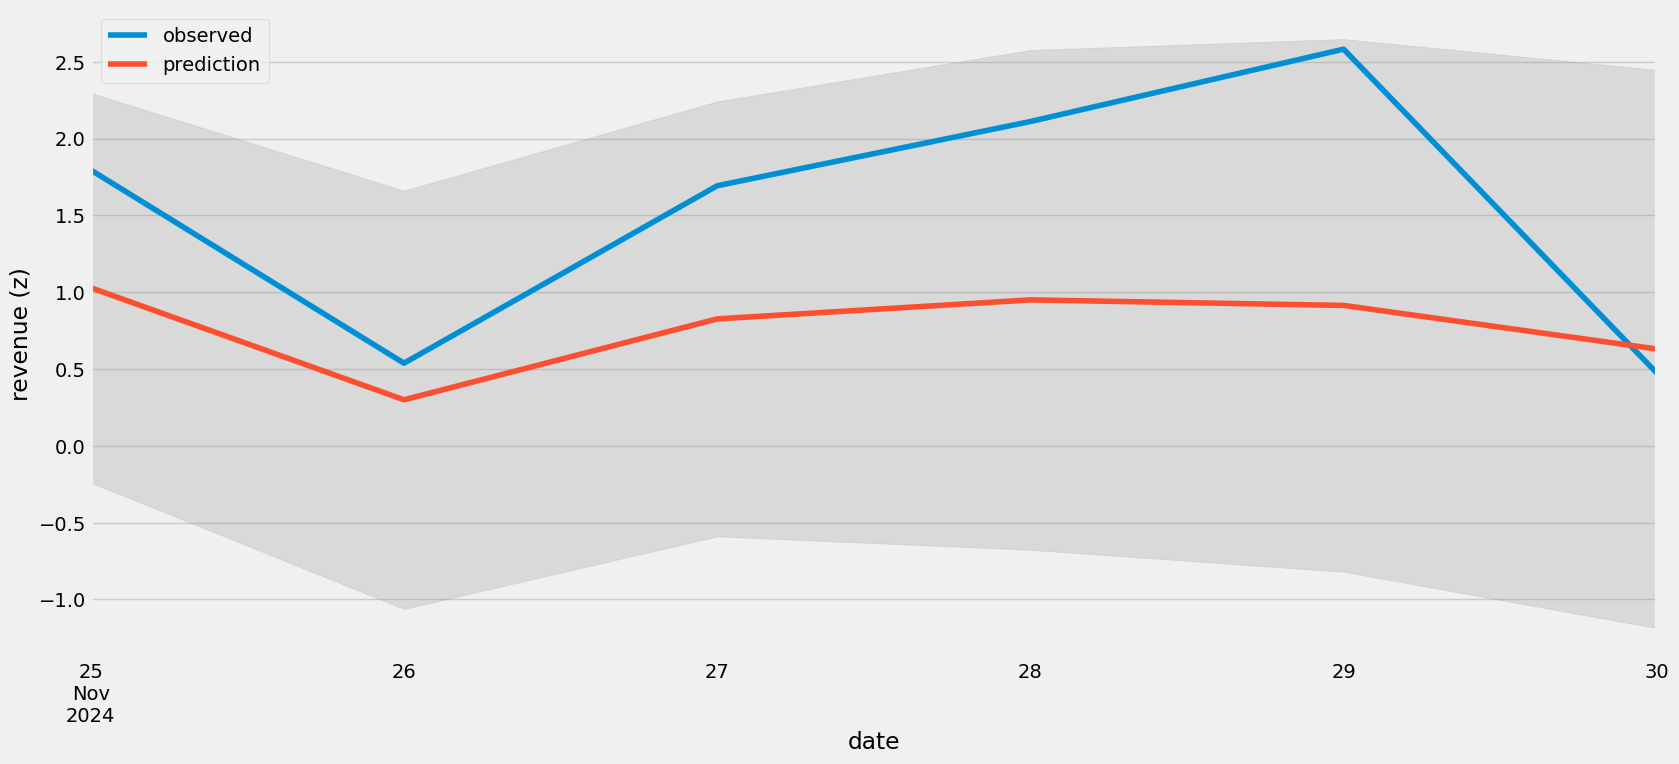

In [27]:
pred = result.get_forecast(steps=test_index)
pred_ci = pred.conf_int()
ci_fill = pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1]

ax = test.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='prediction')
ax.fill_between(*ci_fill, color='grey', alpha=.2)

plt.ylabel('revenue (z)')
plt.legend()
plt.show()

## Evaluation Metrics

### Train Evaluation

In [28]:
mse = result.mse
rmse = mse ** .5

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

MSE: 0.4353
RMSE: 0.6597


### Test Evaluation

In [29]:
test_pred = pred.predicted_mean

mse = ((test - test_pred) ** 2).mean()
rmse = np.sqrt(mse)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

MSE: 0.9250
RMSE: 0.9618


# Forcasting

In [30]:
model_f = ARIMA(y, order=best_p[1], seasonal_order=best_p[2])
result_f = model_f.fit()

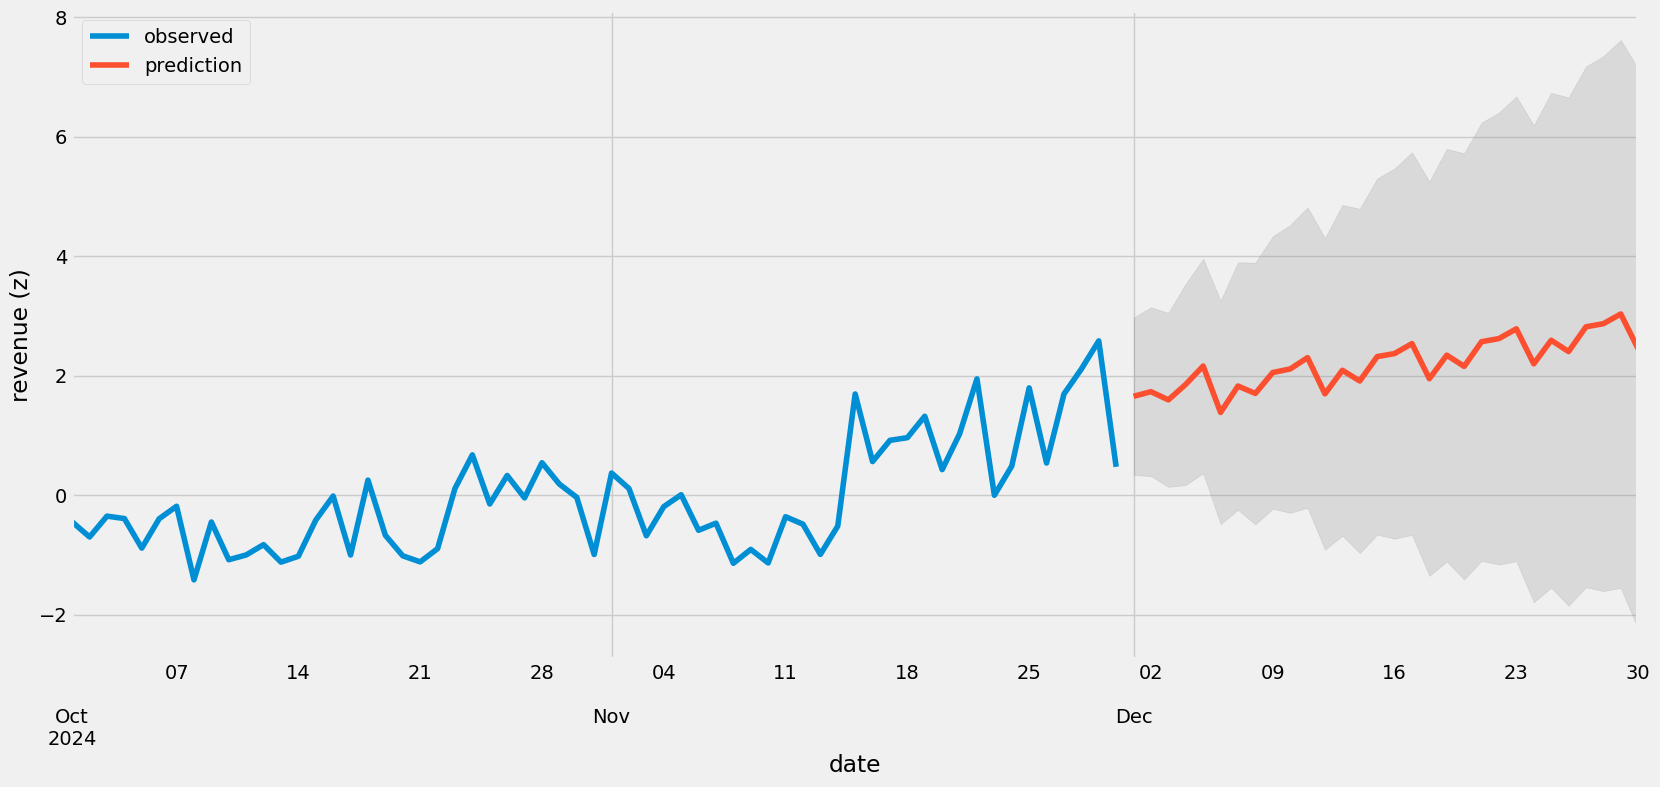

In [31]:
pred_f = result_f.get_forecast(steps=30)
pred_ci_f = pred_f.conf_int()
ci_fill_f = pred_ci_f.index, pred_ci_f.iloc[:,0], pred_ci_f.iloc[:,1]

ax = y.plot(label='observed')
pred_f.predicted_mean.plot(ax=ax,label='prediction')
ax.fill_between(*ci_fill_f, color='grey', alpha=.2)

plt.ylabel('revenue (z)')
plt.legend()
plt.show()